# Laboratorio 3.1: Clustering

**Autores:** Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Mabel Sanchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

**Fecha:** Octubre 2021

## ============= Declaración de compromiso ético =============

Nosotros ****José Luis Cádiz, Maximiliano Jorquera**** , declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 2) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura del laboratorio

Este laboratorio consiste en 2 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering.

# Parte 1: Teoría


**1.** Explique para qué se usan los algoritmos de clustering.

>**Respuesta: Se usan para dividir los datos en grupos significativos o útiles para analizar, de esta manera comprenderlos mejor y conocer cierta caracterización para obetener resultados según el caso de estudio.**

**2.** Explique cómo encontrar outliers en los siguientes métodos de clustering:
>**Respuesta: En k-means los outliers se pueden encontrar con los clusters que tengan una baja cantidad de datos, además los outliers producen centroides no representativos asociados a clusters con alto SSE. Para el clustering jerarquico aglomerativo se pueden encontrar viendo el dendograma fijandose en las alturas de gran tamaño, también se puede ver en la matriz de distancia, fijandose en los puntos en los cuales su distancia sobre sale del promedio.**

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [85]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

C:\Users\Jose Luis\anaconda3\envs\Programacion_Cientifica\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


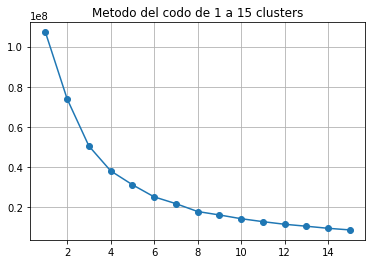

In [86]:
# Respuesta
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.

> **Respuesta: Proponemos usar 10 clusters porque a partir de este número de cluster el SSE disminuye poco y si son menos de 10 el SSE empieza a aumentar en mayores proporciones.**

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [87]:
# Respuesta
random_state = 20
kmeans = KMeans(n_clusters=10, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(X) 
y_pred = kmeans.predict(X)
y_pred

array([0, 4, 6, 4, 6, 3, 4, 4, 3, 4, 6, 0, 3, 4, 3, 3, 4, 6, 0, 0, 0, 6,
       3, 0, 0, 4, 4, 4, 4, 6, 3, 4, 4, 0, 0, 0, 4, 3, 4, 0, 4, 4, 4, 4,
       3, 0, 3, 4, 0, 3, 6, 6, 6, 4, 4, 4, 3, 4, 3, 4, 1, 0, 3, 4, 3, 4,
       3, 1, 1, 7, 7, 3, 3, 3, 6, 0, 0, 0, 3, 3, 0, 3, 6, 0, 0, 0, 0, 6,
       0, 3, 0, 4, 4, 0, 4, 0, 0, 0, 0, 6, 4, 0, 4, 4, 4, 6, 4, 0, 0, 0,
       4, 4, 4, 4, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 3, 0, 6, 0,
       0, 0, 4, 4, 6, 6, 6, 0, 6, 4, 6, 0, 4, 8, 3, 4, 0, 0, 3, 0, 3, 4,
       4, 0, 3, 0, 0, 0, 6, 3, 4, 0, 3, 0, 0, 0, 0, 3, 4, 4, 4, 4, 0, 4,
       0, 4, 3, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4,
       0, 6, 0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 3, 4, 6, 1, 0, 4, 4, 4, 6, 0,
       6, 0, 0, 0, 4, 4, 4, 0, 0, 0, 6, 6, 4, 0, 6, 0, 4, 0, 0, 0, 3, 0,
       0, 3, 0, 4, 0, 0, 4, 0, 0, 6, 6, 6, 4, 4, 4, 4, 4, 6, 4, 0, 0, 4,
       0, 4, 0, 0, 4, 0, 4, 4, 4, 6, 4, 0, 4, 4, 6, 6, 4, 0, 4, 0, 4, 4,
       4, 4, 4, 0, 0, 4, 0, 4, 5, 8, 4, 2, 2, 8, 2,

**4.** Al ejecutar el código anterior (pregunta 3) varias veces, obtenemos resultados diferentes. ¿Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> **Respuesta: Se agregaria un random_state fijo para que los centroides aleatorios no varien al reejecutar el código, otro opción es elegir manualmente los centroides.**

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [88]:
 # PCA
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

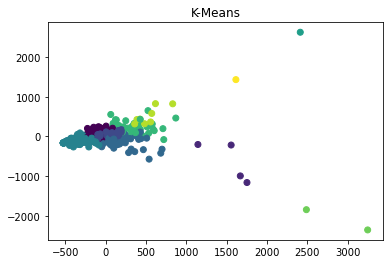

In [89]:
# Respuesta
plt.scatter(new_X[:, 0], new_X[:, 1], c=y_pred)
plt.title("K-Means")
plt.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [91]:
# Respuesta
complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

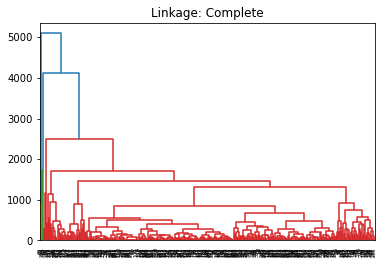

In [92]:
# Complete
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

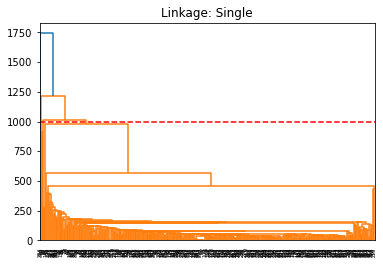

In [93]:
# Single
dendrogram(single)
plt.title("Linkage: Single")
plt.axhline(y=1000, color='r', linestyle='--')
plt.show()

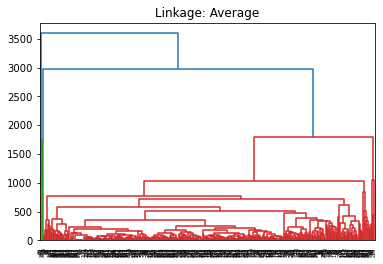

In [94]:
# Average
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

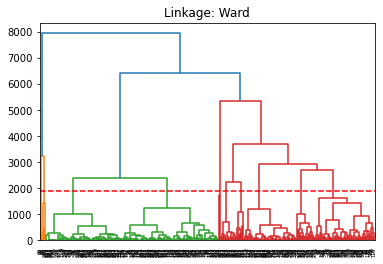

In [95]:
# Ward
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=1900, color='r', linestyle='--')
plt.show()

**2.** Fijándose en el método `single`, "visualmente" cuántos clusters propone usar? A qué altura recomendaría cortar el árbol?

> **Respuesta:Visualmente proponemos usar 3 clusters, cortando el arbol a una altura de 1000, ya que a partir de esa altura de corte se puede ver una clara separación entre los datos.**

**3.** Ahora si miramos el método `ward`, "visualmente" cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> **Respuesta: Visualmente se proponen 9 clusters cortando el arbol a una altura de 1900, ya que a partir de ahí se puede ver una separación más clara de los datos.**

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2** y **3** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2**?

In [96]:
# Respuesta
# Cluster single
single_3 = AgglomerativeClustering(n_clusters=None, linkage="single",distance_threshold=1000).fit(X)
y_pred_single=single_3.labels_
print(single_3.n_clusters_)
print(y_pred_single)

4
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
# Respuesta
# Cluster ward
ward_9 = AgglomerativeClustering(n_clusters=None, linkage="ward",distance_threshold=1900).fit(X)
y_pred_ward=ward_9.labels_
print(ward_9.n_clusters_)
print(y_pred_ward)

10
[2 8 6 8 2 2 8 8 2 8 2 3 2 3 2 2 8 7 6 6 2 7 2 3 3 3 8 8 8 2 2 8 3 6 3 3 8
 2 3 3 3 8 8 8 2 6 2 8 3 2 2 7 2 8 3 8 2 8 2 8 1 3 2 8 3 8 2 1 1 5 5 2 2 2
 7 3 3 3 2 2 2 2 2 3 6 3 6 7 3 2 6 8 3 6 8 3 6 6 6 7 8 3 3 8 8 7 3 3 3 3 8
 8 3 8 6 2 2 6 6 3 3 6 3 3 3 6 8 3 2 3 7 6 3 3 3 8 6 7 6 3 7 8 6 3 3 4 2 3
 3 3 2 3 2 8 3 3 2 6 6 6 6 2 3 6 2 3 3 3 3 3 8 3 3 3 6 3 3 8 2 3 3 6 8 3 8
 3 8 8 3 8 3 6 3 3 3 8 8 8 6 7 6 8 3 3 8 6 6 6 8 6 2 8 7 1 3 8 8 8 7 3 7 6
 3 3 8 8 3 6 3 6 7 7 8 6 7 6 3 6 6 3 2 3 6 2 6 8 3 3 8 3 3 2 7 7 3 8 8 8 8
 2 8 6 3 8 3 8 3 3 8 3 8 8 8 6 8 6 3 8 6 6 8 6 8 6 8 8 8 8 8 6 6 8 6 8 0 4
 3 9 9 4 2 4 4 9 9 9 2 7 2 9 9 9 3 4 9 2 0 3 9 9 4 9 9 4 9 2 9 3 2 2 2 3 9
 3 2 3 2 8 2 8 8 2 3 2 2 2]


Para el metodo single se generan 4 cluster cortando en la altura definida y para el metodo ward se generaron 10 cluster.

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`.

In [98]:
# Single
pd.DataFrame(y_pred_single).value_counts()

0    342
1      2
2      1
3      1
dtype: int64

In [99]:
# Ward
pd.DataFrame(y_pred_ward).value_counts()

3    99
8    80
2    61
6    54
7    20
9    16
4     8
1     4
0     2
5     2
dtype: int64

**6.** Usando el dataset con dimensiones reducidas generado en la parte K-means, pregunta **5**: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters.

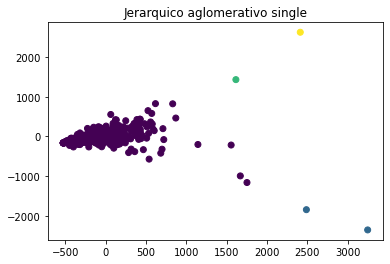

In [100]:
# Respuesta
plt.scatter(new_X[:, 0], new_X[:, 1], c=y_pred_single)
plt.title("Jerarquico aglomerativo single")
plt.show()

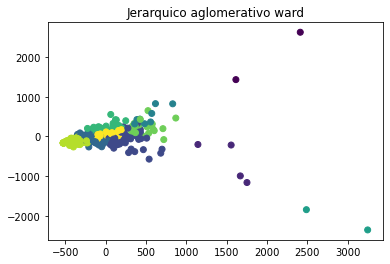

In [101]:
# Respuesta
plt.scatter(new_X[:, 0], new_X[:, 1], c=y_pred_ward)
plt.title("Jerarquico aglomerativo ward")
plt.show()

## Análisis

**1.** Seleccione alguno de los métodos de clustering aplicados anteriormente e interprete los clusters obtenidos. 
* a) ¿Qué puede decir de los clusters generados? 

**Eligiendo el clustering jerarquico aglomerativo single se puede decir que los cluster generados no son buenos ya que no permite dividir los datos en grupos significativos o utiles para hacer analisis.**
* b) ¿Existen patrones de agrupación?

**A partir de la visualición mediante PCA se puede observar que los datos se agrupan en un solo gran cluster, en donde además existen outliers. Para generar mejores patrones de agrupación se deberian agregar nuevas carácteristicas que permitan separar los datos.**
